<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 (DCGAN's) Deep Convolutional || Generative-AI🔥</div>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
<div style="text-align:center">
    <img src="https://www.researchgate.net/publication/348517810/figure/fig1/AS:980927836594177@1610882829440/Schematic-representation-of-DCGANs-the-deep-convolutional-neural-networks-were-utilized.png
" alt="Image">
</div>
</div>

### What is a DCGAN?

A Deep Convolutional Generative Adversarial Network (DCGAN) is an extension of the standard GAN architecture that uses deep convolutional networks for both the generator and discriminator models. Here's a breakdown of its key components and concepts:

#### 1. **Generative Adversarial Network (GAN)**:
- **Concept**: GANs consist of two neural networks, a Generator and a Discriminator, which compete against each other in a zero-sum game.
- **Objective**: The Generator tries to produce realistic data (e.g., images) from random noise, while the Discriminator tries to distinguish between real data and fake data generated by the Generator.

#### 2. **Deep Convolutional Networks**:
- **Use in DCGAN**: Both the Generator and Discriminator are designed using convolutional layers, which are particularly effective for processing image data.

#### 3. **DCGAN Architecture**:
- **Generator**: 
  - Starts with a fully connected layer that reshapes the input noise vector into a small, low-resolution feature map.
  - Uses transposed convolutional layers (also known as deconvolutional layers) to upsample the feature maps, gradually increasing their spatial dimensions to produce a high-resolution image.
  - Applies batch normalization and ReLU activations to stabilize training and improve convergence.

- **Discriminator**:
  - Takes an image as input and uses standard convolutional layers to downsample the image, extracting hierarchical features.
  - Uses leaky ReLU activations and dropout to prevent overfitting.
  - Ends with a fully connected layer that outputs a single value, representing the probability that the input image is real.

#### 4. **Training Process**:
- **Adversarial Training**: The Generator and Discriminator are trained simultaneously in a two-step process:
  - **Discriminator Update**: The Discriminator is trained to correctly classify real images as real and fake images as fake.
  - **Generator Update**: The Generator is trained to produce images that the Discriminator classifies as real.

#### 5. **Key Features of DCGANs**:
- **Strided Convolutions**: Used instead of pooling layers for downsampling in the Discriminator and upsampling in the Generator.
- **Batch Normalization**: Applied to stabilize training by normalizing activations, reducing internal covariate shift.
- **ReLU and Leaky ReLU Activations**: ReLU is used in the Generator (except for the output layer), and Leaky ReLU is used in the Discriminator to allow for small gradient flows when the units are not active.

#### 6. **Applications**:
- **Image Generation**: Creating realistic images from random noise.
- **Image-to-Image Translation**: Adapting the architecture for tasks like translating sketches to photos or day-to-night conversion.
- **Super-Resolution**: Enhancing the resolution of images.

In summary, DCGANs leverage the power of convolutional neural networks to improve the quality and stability of GANs, making them well-suited for generating high-quality images.

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">📚 Importing Libraries 📚</div>
</div>

In [21]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🛠 Normalization 🛠</div>
</div>

In [22]:
# Load and preprocess dataset
(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()

In [23]:
x_train = x_train.astype('float32') / 255.0
x_train = np.expand_dims(x_train, axis=-1)

In [24]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

In [25]:
train_dataset = tf.data.Dataset.from_tensor_slices(x_train).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Creating a TensorFlow Dataset Explanation</h2>
        <p>The provided code snippet creates a TensorFlow dataset from training data, shuffles the data, and batches it for training purposes.</p>
        <ul>
            <li><b>Step 1: Dataset Initialization</b>
                <ul>
                    <li>The <code>tf.data.Dataset.from_tensor_slices(x_train)</code> function converts the <code>x_train</code> NumPy array into a <code>tf.data.Dataset</code> object.</li>
                    <li>Each element in the dataset corresponds to a single sample from the <code>x_train</code> array.</li>
                </ul>
            </li>
            <li><b>Step 2: Shuffling the Dataset</b>
                <ul>
                    <li>The <code>.shuffle(BUFFER_SIZE)</code> method randomly shuffles the elements of the dataset.</li>
                    <li>The <code>BUFFER_SIZE</code> parameter determines the size of the buffer from which elements are sampled, ensuring thorough shuffling.</li>
                </ul>
            </li>
            <li><b>Step 3: Batching the Dataset</b>
                <ul>
                    <li>The <code>.batch(BATCH_SIZE)</code> method groups the dataset elements into batches of size <code>BATCH_SIZE</code>.</li>
                    <li>This allows the model to process multiple samples in parallel, enhancing training efficiency and stability.</li>
                </ul>
            </li>
        </ul>
    </div>
</div>


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 DCGAN's Model 🔥</div>
</div>

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Generator Model ✔
  </div>
</div>

In [26]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Reshape((7, 7, 256)))
    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    model.add(layers.BatchNormalization())
    model.add(layers.ReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))

    return model

<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Generator Model Creation Explanation</h2>
        <p>The provided code snippet defines a generator model for a DCGAN, which generates images from random noise.</p>
        <ul>
            <li><b>Step 1: Model Initialization</b>
                <ul>
                    <li>The <code>tf.keras.Sequential()</code> object is created to build a linear stack of layers for the generator model.</li>
                </ul>
            </li>
            <li><b>Step 2: Dense Layer</b>
                <ul>
                    <li>A <code>Dense</code> layer with 7*7*256 units is added, without using bias.</li>
                    <li>It reshapes the input noise vector (of shape (100,)) into a 7x7x256 feature map.</li>
                </ul>
            </li>
            <li><b>Step 3: Batch Normalization and Activation</b>
                <ul>
                    <li>A <code>BatchNormalization</code> layer is added to stabilize and speed up the training.</li>
                    <li>A <code>ReLU</code> activation function is applied to introduce non-linearity.</li>
                </ul>
            </li>
            <li><b>Step 4: Reshape Layer</b>
                <ul>
                    <li>The <code>Reshape</code> layer reshapes the output into a 7x7x256 tensor.</li>
                </ul>
            </li>
            <li><b>Step 5: Transposed Convolution Layers</b>
                <ul>
                    <li>A <code>Conv2DTranspose</code> layer with 128 filters, a 5x5 kernel, stride of (1, 1), and 'same' padding is added.</li>
                    <li>Batch normalization and ReLU activation are applied again.</li>
                    <li>Another <code>Conv2DTranspose</code> layer with 64 filters, a 5x5 kernel, stride of (2, 2), and 'same' padding is added.</li>
                    <li>Batch normalization and ReLU activation are applied again.</li>
                    <li>A final <code>Conv2DTranspose</code> layer with 1 filter, a 5x5 kernel, stride of (2, 2), and 'same' padding is added, with a <code>tanh</code> activation function to produce the output image.</li>
                </ul>
            </li>
        </ul>
        <p>The generator model is then returned, ready to be used in the GAN training process.</p>
    </div>
</div>


<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Discriminator Model ✔
  </div>
</div>

In [27]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Discriminator Model Creation Explanation</h2>
        <p>The provided code snippet defines a discriminator model for a DCGAN, which distinguishes between real and fake images.</p>
        <ul>
            <li><b>Step 1: Model Initialization</b>
                <ul>
                    <li>The <code>tf.keras.Sequential()</code> object is created to build a linear stack of layers for the discriminator model.</li>
                </ul>
            </li>
            <li><b>Step 2: First Convolutional Layer</b>
                <ul>
                    <li>A <code>Conv2D</code> layer with 64 filters, a 5x5 kernel, stride of (2, 2), and 'same' padding is added.</li>
                    <li>This layer processes the input image of shape (28, 28, 1).</li>
                    <li>A <code>LeakyReLU</code> activation function is applied to introduce non-linearity.</li>
                    <li>A <code>Dropout</code> layer with a dropout rate of 0.3 is added to prevent overfitting.</li>
                </ul>
            </li>
            <li><b>Step 3: Second Convolutional Layer</b>
                <ul>
                    <li>A <code>Conv2D</code> layer with 128 filters, a 5x5 kernel, stride of (2, 2), and 'same' padding is added.</li>
                    <li>A <code>LeakyReLU</code> activation function is applied again.</li>
                    <li>A <code>Dropout</code> layer with a dropout rate of 0.3 is added again.</li>
                </ul>
            </li>
            <li><b>Step 4: Flatten and Dense Layers</b>
                <ul>
                    <li>The <code>Flatten</code> layer converts the 2D feature maps into a 1D feature vector.</li>
                    <li>A <code>Dense</code> layer with a single unit is added, producing a single output value representing the authenticity of the input image (real or fake).</li>
                </ul>
            </li>
        </ul>
        <p>The discriminator model is then returned, ready to be used in the GAN training process.</p>
    </div>
</div>


In [28]:
generator = make_generator_model()
discriminator = make_discriminator_model()

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Generator Model Summary ✔
  </div>
</div>

In [29]:
generator.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 12544)          │     1,254,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 12544)          │        50,176 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape_1 (Reshape)             │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_3              │ (None, 7, 7, 128)      │       819,200 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 7, 7, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_4              │ (None, 14, 14, 64)     │       204,800 │
│ (Conv2DTranspose)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_transpose_5              │ (None, 28, 28, 1)      │         1,600 │
│ (Conv2DTranspose)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

<div class="text_cell_render border-box-sizing rendered_html">
  <div style="color:black; border: 2px solid #ff6347; background-color:#ff6347; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Arial', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); box-shadow: 0 4px 8px rgba(0, 0, 0, 0.4);">
   ✔ Discriminator Model Summary ✔
  </div>
</div>

In [30]:
discriminator.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 14, 14, 64)     │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_2 (LeakyReLU)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 7, 7, 128)      │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ leaky_re_lu_3 (LeakyReLU)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │         6,273 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

![](https://miro.medium.com/v2/resize:fit:1400/0*d6uK5r08HQEhWbLW.png)

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 DCGAN's Model Loss 🔥</div>
</div>

In [32]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Loss Functions for DCGAN Explanation</h2>
        <p>The provided code snippets define the loss functions for the discriminator and generator in a DCGAN, which are crucial for training the models.</p>
        <ul>
            <li><b>Discriminator Loss</b>
                <ul>
                    <li>The <code>discriminator_loss</code> function calculates the loss for the discriminator model.</li>
                    <li><code>real_loss</code> computes the loss for real images, comparing the discriminator's predictions (<code>real_output</code>) to a tensor of ones (indicating real images).</li>
                    <li><code>fake_loss</code> computes the loss for fake images, comparing the discriminator's predictions (<code>fake_output</code>) to a tensor of zeros (indicating fake images).</li>
                    <li><code>total_loss</code> sums up <code>real_loss</code> and <code>fake_loss</code> to get the overall loss for the discriminator.</li>
                </ul>
            </li>
            <li><b>Generator Loss</b>
                <ul>
                    <li>The <code>generator_loss</code> function calculates the loss for the generator model.</li>
                    <li>It compares the discriminator's predictions on fake images (<code>fake_output</code>) to a tensor of ones, aiming for the discriminator to classify the fake images as real.</li>
                </ul>
            </li>
        </ul>
        <p>Both loss functions use the <code>cross_entropy</code> function, which measures the dissimilarity between predicted and actual labels, encouraging the models to improve during training.</p>
    </div>
</div>


In [33]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [34]:
EPOCHS = 50
noise_dim = 100
num_examples_to_generate = 16

seed = tf.random.normal([num_examples_to_generate, noise_dim])

<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 DCGAN's Model Training 🔥</div>
</div>

In [35]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))


<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Training Step for DCGAN Explanation</h2>
        <p>The provided code snippet defines a single training step for the DCGAN, which updates the generator and discriminator models.</p>
        <ul>
            <li><b>Step 1: Generate Noise</b>
                <ul>
                    <li><code>noise = tf.random.normal([BATCH_SIZE, noise_dim])</code> generates random noise vectors of shape <code>(BATCH_SIZE, noise_dim)</code> to be used as input for the generator.</li>
                </ul>
            </li>
            <li><b>Step 2: Gradient Tape Context</b>
                <ul>
                    <li><code>with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:</code> creates two gradient tapes to record operations for automatic differentiation.</li>
                </ul>
            </li>
            <li><b>Step 3: Generate Fake Images</b>
                <ul>
                    <li><code>generated_images = generator(noise, training=True)</code> uses the generator to create fake images from the noise vectors.</li>
                </ul>
            </li>
            <li><b>Step 4: Discriminator Predictions</b>
                <ul>
                    <li><code>real_output = discriminator(images, training=True)</code> obtains the discriminator's predictions on real images.</li>
                    <li><code>fake_output = discriminator(generated_images, training=True)</code> obtains the discriminator's predictions on the generated fake images.</li>
                </ul>
            </li>
            <li><b>Step 5: Calculate Losses</b>
                <ul>
                    <li><code>gen_loss = generator_loss(fake_output)</code> computes the generator's loss based on the discriminator's predictions on fake images.</li>
                    <li><code>disc_loss = discriminator_loss(real_output, fake_output)</code> computes the discriminator's loss based on its predictions on both real and fake images.</li>
                </ul>
            </li>
            <li><b>Step 6: Compute Gradients</b>
                <ul>
                    <li><code>gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)</code> calculates the gradients of the generator's loss with respect to its trainable variables.</li>
                    <li><code>gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)</code> calculates the gradients of the discriminator's loss with respect to its trainable variables.</li>
                </ul>
            </li>
            <li><b>Step 7: Apply Gradients</b>
                <ul>
                    <li><code>generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))</code> updates the generator's weights using the computed gradients.</li>
                    <li><code>discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))</code> updates the discriminator's weights using the computed gradients.</li>
                </ul>
            </li>
        </ul>
        <p>This process iteratively updates both models to improve their performance in generating realistic images (generator) and distinguishing real from fake images (discriminator).</p>
    </div>
</div>


In [38]:
def train(dataset, epochs):
    for epoch in range(epochs):
        for image_batch in dataset:
            train_step(image_batch)

        clear_output(wait=True)
        generate_and_save_images(generator, epoch + 1, seed)

        print(f'Epoch {epoch + 1} completed')

    clear_output(wait=True)
    generate_and_save_images(generator, epochs, seed)

<div class="text_cell_render border-box-sizing rendered_html">
    <div style="color:black; border: 2px solid #6f31c1; background-color:#ffffff; padding: 20px; border-radius: 15px; font-size: 16px; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:left; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">
        <h2>Training Loop for DCGAN Explanation</h2>
        <p>The provided code snippet defines the training loop for the DCGAN, which iteratively updates the models over a specified number of epochs.</p>
        <ul>
            <li><b>Step 1: Epoch Loop</b>
                <ul>
                    <li>The outer loop <code>for epoch in range(epochs):</code> iterates over the specified number of epochs.</li>
                </ul>
            </li>
            <li><b>Step 2: Batch Loop</b>
                <ul>
                    <li>The inner loop <code>for image_batch in dataset:</code> iterates over the dataset in batches, processing each batch of images.</li>
                    <li>The <code>train_step(image_batch)</code> function is called for each batch to update the generator and discriminator models.</li>
                </ul>
            </li>
            <li><b>Step 3: Clear Output and Generate Images</b>
                <ul>
                    <li>The <code>clear_output(wait=True)</code> function clears the current output to prepare for displaying new results.</li>
                    <li>The <code>generate_and_save_images(generator, epoch + 1, seed)</code> function generates and saves images using the generator model, using a fixed seed for reproducibility.</li>
                </ul>
            </li>
            <li><b>Step 4: Print Epoch Completion</b>
                <ul>
                    <li>The <code>print(f'Epoch {epoch + 1} completed')</code> statement prints a message indicating the completion of the current epoch.</li>
                </ul>
            </li>
            <li><b>Step 5: Final Output and Image Generation</b>
                <ul>
                    <li>After the outer loop completes, <code>clear_output(wait=True)</code> and <code>generate_and_save_images(generator, epochs, seed)</code> are called again to clear the output and generate final images.</li>
                </ul>
            </li>
        </ul>
        <p>This training loop iteratively updates the models over the specified number of epochs, generating and saving images at each epoch to monitor progress.</p>
    </div>
</div>


<div class="text_cell_render border-box-sizing rendered_html">
<div style="color:black; border: 2px solid #6f42c1; background-color:#f3e8ff; padding: 20px; border-radius: 15px; font-size: 200%; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; text-align:center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7);">🔥 DCGAN's Prediction (Images) 🔥</div>
</div>

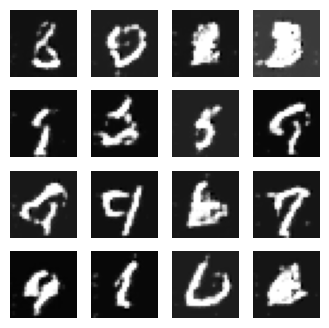

In [39]:
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    fig = plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i + 1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.show()

# Train the DCGAN
train(train_dataset, EPOCHS)